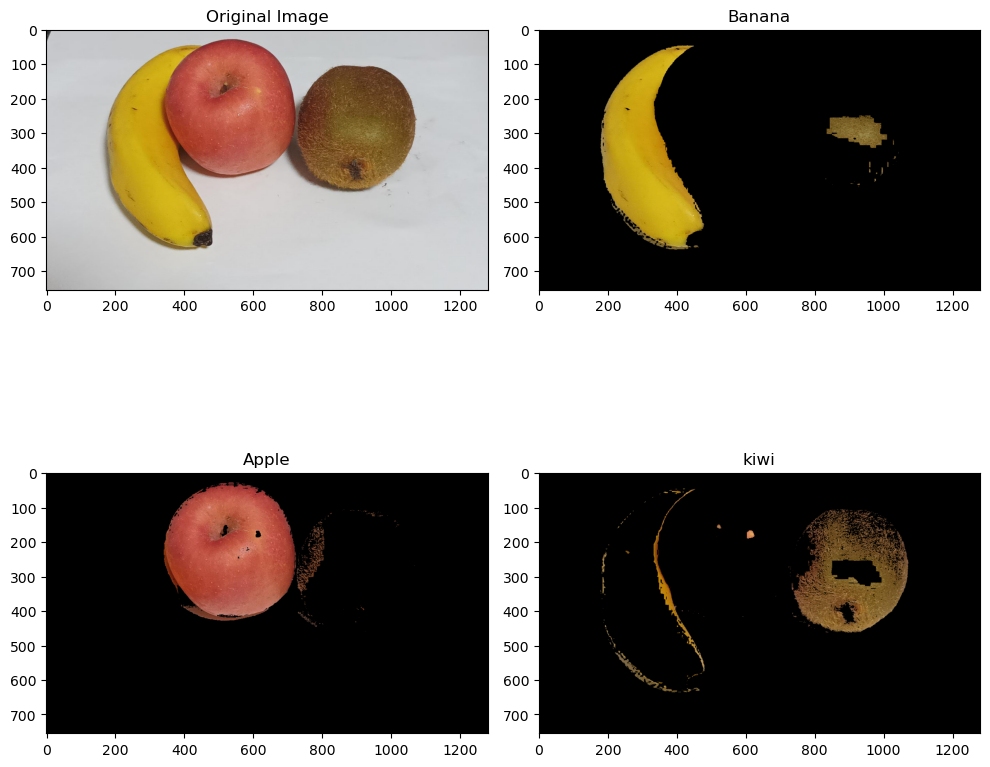

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('kiwi.jpg')

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_banana = np.array([20, 100, 100])
upper_banana = np.array([30, 255, 255])

lower_apple = np.array([0, 100, 100])
upper_apple = np.array([10, 255, 255])

lower_kiwi = np.array([10, 100, 100])
upper_kiwi = np.array([20, 255, 255])

mask_banana = cv2.inRange(hsv_img, lower_banana, upper_banana)
mask_apple = cv2.inRange(hsv_img, lower_apple, upper_apple)
mask_kiwi = cv2.inRange(hsv_img, lower_kiwi, upper_kiwi)

result_banana = cv2.bitwise_and(img, img, mask=mask_banana)
result_apple = cv2.bitwise_and(img, img, mask=mask_apple)
result_kiwi = cv2.bitwise_and(img, img, mask=mask_kiwi)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned_mask_banana = cv2.morphologyEx(mask_banana, cv2.MORPH_OPEN, kernel)
cleaned_mask_apple = cv2.morphologyEx(mask_apple, cv2.MORPH_OPEN, kernel)
cleaned_mask_kiwi = cv2.morphologyEx(mask_kiwi, cv2.MORPH_OPEN, kernel)

contours_banana, _ = cv2.findContours(cleaned_mask_banana, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_apple, _ = cv2.findContours(cleaned_mask_apple, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_kiwi, _ = cv2.findContours(cleaned_mask_kiwi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(result_banana, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Banana')

axs[1, 0].imshow(cv2.cvtColor(result_apple, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Apple')

axs[1, 1].imshow(cv2.cvtColor(result_kiwi, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('kiwi')

plt.tight_layout()
plt.show()
